In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
print(list(leads.columns))

['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


# As we need a model that predicts on the data which is provided by user, we can drop columns which are generated by sales team after evaluating the lead.
    - Last Activity:---------Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
    - Last Notable Activity:-The last notable acitivity performed by the student.
    - Lead Profile:----------A lead level assigned to each customer based on their profile.
    - Tags:------------------Tags assigned to customers indicating the current status of the lead.
    - Lead Quality:----------Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
    - Asymmetrique Activity Index \
    - Asymmetrique Profile Index   \  
                                    An index and score assigned to each customer based on their activity and their profile.
    - Asymmetrique Activity Score  /
    - Asymmetrique Profile Score  /

In [5]:
leads = leads.drop(['Last Activity','Last Notable Activity','Lead Profile','Tags','Lead Quality','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [6]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,Select,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,Select,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No


We can also drop Prospect ID and Lead Number

In [7]:
leads = leads.drop(['Prospect ID'], axis=1)

# DATA CLEANING

In [8]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [9]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Country                                        6779 

#### CHECKING NULL VALUES

In [10]:
(leads.isnull().sum()/len(leads))*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [11]:
leads['TotalVisits'].isnull().sum()

137

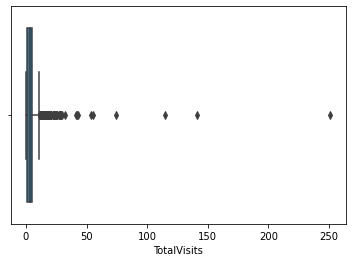

In [12]:
sns.boxplot(leads['TotalVisits'])
plt.show()

In [13]:
leads[leads['TotalVisits']>=35]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
1160,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,India,...,No,No,No,No,No,No,No,Thane & Outskirts,No,No
2190,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,India,...,No,No,No,No,No,No,No,Other Cities,No,Yes
2322,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
5283,609249,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33,India,...,No,No,No,No,No,No,No,Thane & Outskirts,No,No
5530,607494,Landing Page Submission,Direct Traffic,Yes,No,0,41.0,311,1.14,India,...,No,No,No,No,No,No,No,Other Cities,No,No
5538,607470,Landing Page Submission,Referral Sites,No,No,0,54.0,1280,4.50,India,...,No,No,No,No,No,No,No,Mumbai,No,No
5608,606961,Landing Page Submission,Referral Sites,Yes,No,0,115.0,187,8.21,India,...,No,No,No,No,No,No,No,Mumbai,No,No
6102,602958,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
8230,587083,Landing Page Submission,Direct Traffic,Yes,No,0,42.0,1148,3.82,India,...,No,No,No,No,No,No,No,Thane & Outskirts,No,No


In [14]:
leads.drop(leads[leads['TotalVisits']>=35].index, inplace=True)

In [15]:
leads['TotalVisits'].median()

3.0

In [16]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)

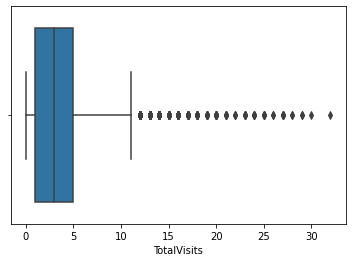

In [17]:
sns.boxplot(leads['TotalVisits'])
plt.show()

In [18]:
# Page Views Per Visit
leads["Page Views Per Visit"].isnull().sum()

137

<AxesSubplot:xlabel='Page Views Per Visit'>

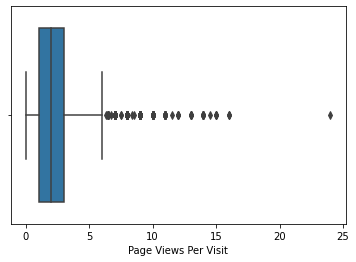

In [19]:
sns.boxplot(leads["Page Views Per Visit"])

In [20]:
leads[leads["Page Views Per Visit"]>=15]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
125,659241,API,Referral Sites,No,No,0,16.0,53,16.0,India,...,No,No,No,No,No,No,No,NaN,No,No
387,656382,Landing Page Submission,Google,No,No,0,15.0,753,15.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
4518,616382,Landing Page Submission,Direct Traffic,Yes,No,0,15.0,978,15.0,India,...,No,No,No,No,No,No,No,Other Metro Cities,No,No
5164,610357,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
5495,607748,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,India,...,No,No,No,No,No,No,No,Other Cities of Maharashtra,No,Yes
5915,604460,Landing Page Submission,Organic Search,No,No,1,15.0,1603,15.0,India,...,No,No,No,No,No,No,No,Other Metro Cities,No,Yes
6805,597579,API,Organic Search,No,No,1,24.0,1527,24.0,unknown,...,No,No,No,No,No,No,No,NaN,No,No
8640,583774,Landing Page Submission,Organic Search,No,No,0,15.0,1042,15.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes


In [21]:
leads.drop(leads[leads['Page Views Per Visit']>=15].index,inplace=True)

In [22]:
leads['Page Views Per Visit'].median()

2.0

In [23]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

<AxesSubplot:xlabel='Page Views Per Visit'>

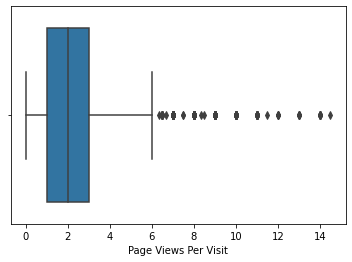

In [24]:
sns.boxplot(leads["Page Views Per Visit"])

In [25]:
leads.Country.value_counts(normalize=True)*100

India                   95.770482
United States            1.020408
United Arab Emirates     0.783792
Singapore                0.354925
Saudi Arabia             0.310559
United Kingdom           0.221828
Australia                0.192251
Qatar                    0.147885
Hong Kong                0.103520
Bahrain                  0.103520
France                   0.088731
Oman                     0.088731
Germany                  0.059154
unknown                  0.059154
South Africa             0.059154
Nigeria                  0.059154
Kuwait                   0.059154
Canada                   0.059154
Sweden                   0.044366
China                    0.029577
Asia/Pacific Region      0.029577
Uganda                   0.029577
Bangladesh               0.029577
Italy                    0.029577
Belgium                  0.029577
Netherlands              0.029577
Ghana                    0.029577
Philippines              0.029577
Russia                   0.014789
Switzerland   

In [26]:
leads.Country.isnull().sum()

2461

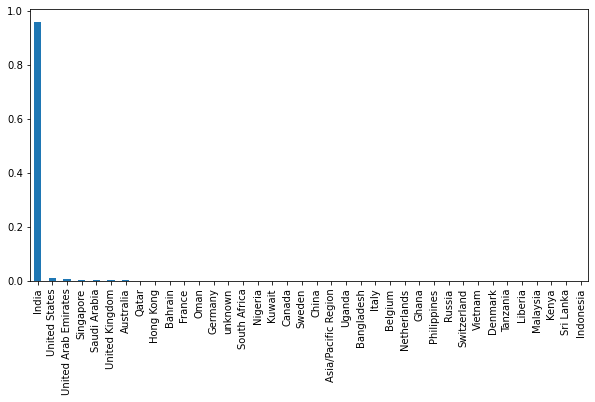

In [27]:
plt.figure(figsize=(10,5))
leads.Country.value_counts(normalize=True).plot.bar()
plt.show()

In [28]:
leads.drop(['Country'],axis=1,inplace=True)

We can drop this column as 95% of data is from one country only ****INDIA****

In [29]:
leads['How did you hear about X Education'].isnull().sum()

2201

In [30]:
leads['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.717459
Online Search            11.478211
Word Of Mouth             4.955853
Student of SomeSchool     4.414697
Other                     2.648818
Multiple Sources          2.164625
Advertisements            0.968385
Social Media              0.954144
Email                     0.370265
SMS                       0.327542
Name: How did you hear about X Education, dtype: float64

In [31]:
leads.drop(["How did you hear about X Education"], axis=1, inplace=True)

70% missinig values hence droping column. ALso note maximun users are from ****Online Search****

In [32]:
(leads['Specialization'].isnull().sum()/len(leads))*100

15.56977122411363

In [33]:
leads['Specialization'].value_counts(normalize=True)*100

Select                               24.900475
Finance Management                   12.520868
Human Resource Management            10.877103
Marketing Management                 10.748684
Operations Management                 6.459484
Business Administration               5.175292
IT Projects Management                4.674457
Supply Chain Management               4.468987
Banking, Investment And Insurance     4.327726
Travel and Tourism                    2.606909
Media and Advertising                 2.594067
International Business                2.285861
Healthcare Management                 2.041865
Hospitality Management                1.463978
E-COMMERCE                            1.425453
Retail Management                     1.258508
Rural and Agribusiness                0.924618
E-Business                            0.731989
Services Excellence                   0.513677
Name: Specialization, dtype: float64

In [34]:
leads["Specialization"].fillna("Select",inplace=True)

In [35]:
leads['Specialization'].value_counts(normalize=True)*100

Select                               36.593299
Finance Management                   10.571398
Human Resource Management             9.183563
Marketing Management                  9.075138
Operations Management                 5.453757
Business Administration               4.369511
IT Projects Management                3.946655
Supply Chain Management               3.773176
Banking, Investment And Insurance     3.653909
Travel and Tourism                    2.201019
Media and Advertising                 2.190177
International Business                1.929958
Healthcare Management                 1.723951
Hospitality Management                1.236040
E-COMMERCE                            1.203513
Retail Management                     1.062561
Rural and Agribusiness                0.780657
E-Business                            0.618020
Services Excellence                   0.433698
Name: Specialization, dtype: float64

In [36]:
leads['Specialization'].mode()

0    Select
Name: Specialization, dtype: object

In [37]:
leads.drop(['Specialization'], axis=1, inplace=True)

We can drop "Specialization" as NULL values are 3X to the 2nd highest available value i.e. ****Finance Management****

In [38]:
#"What is your current occupation"
(leads["What is your current occupation"].isnull().sum()/len(leads))*100

29.10116014312046

In [39]:
leads["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.471785
Working Professional    10.796758
Student                  3.211500
Other                    0.244686
Housewife                0.152929
Businessman              0.122343
Name: What is your current occupation, dtype: float64

In [40]:
leads['What is your current occupation'].mode()[0]

'Unemployed'

In [41]:
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace=True)

In [42]:
leads["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              89.699664
Working Professional     7.654776
Student                  2.276916
Other                    0.173479
Housewife                0.108425
Businessman              0.086740
Name: What is your current occupation, dtype: float64

In [43]:
#What matters most to you in choosing a course
(leads['What matters most to you in choosing a course'].isnull().sum()/len(leads))*100

29.29632440637537

In [44]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.953995
Flexibility & Convenience     0.030670
Other                         0.015335
Name: What matters most to you in choosing a course, dtype: float64

In [45]:
leads.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

Hence we can drop this column

In [46]:
#City
(leads['City'].isnull().sum()/len(leads))*100

15.374606960858722

In [47]:
leads["City"].value_counts(normalize=True)*100

Mumbai                         41.191544
Select                         28.814862
Thane & Outskirts               9.596413
Other Cities                    8.763613
Other Cities of Maharashtra     5.842409
Other Metro Cities              4.843049
Tier II Cities                  0.948110
Name: City, dtype: float64

In [48]:
leads.City.mode()[0]

'Mumbai'

In [49]:
leads.City.fillna(leads.City.mode()[0], inplace=True)

In [50]:
leads["City"].value_counts(normalize=True)*100

Mumbai                         50.233113
Select                         24.384690
Thane & Outskirts               8.121002
Other Cities                    7.416242
Other Cities of Maharashtra     4.944161
Other Metro Cities              4.098450
Tier II Cities                  0.802342
Name: City, dtype: float64

In [51]:
leads['City'].replace(to_replace ="Select",value=(leads.City.mode()[0]), inplace=True)

In [52]:
leads.City.value_counts(normalize=True)*100

Mumbai                         74.617803
Thane & Outskirts               8.121002
Other Cities                    7.416242
Other Cities of Maharashtra     4.944161
Other Metro Cities              4.098450
Tier II Cities                  0.802342
Name: City, dtype: float64

In [53]:
leads.drop(['City'],axis=1,inplace=True)

In [54]:
leads['Lead Source'].isnull().sum()

36

In [55]:
leads['Lead Source'].mode()[0]

'Google'

In [56]:
leads["Lead Source"].fillna(leads['Lead Source'].mode()[0],inplace=True)

#### CHECKING FOR "SELECT" values

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9223 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9223 non-null   int64  
 1   Lead Origin                               9223 non-null   object 
 2   Lead Source                               9223 non-null   object 
 3   Do Not Email                              9223 non-null   object 
 4   Do Not Call                               9223 non-null   object 
 5   Converted                                 9223 non-null   int64  
 6   TotalVisits                               9223 non-null   float64
 7   Total Time Spent on Website               9223 non-null   int64  
 8   Page Views Per Visit                      9223 non-null   float64
 9   What is your current occupation           9223 non-null   object 
 10  Search                              

In [58]:
def var_percent(x):
    y = x.value_counts(normalize=True)*100
    return y

In [59]:
var_percent(leads['Lead Source'])

Google               31.464816
Direct Traffic       27.474791
Olark Chat           19.028516
Organic Search       12.479670
Reference             5.789873
Welingak Website      1.539629
Referral Sites        1.322780
Facebook              0.596335
bing                  0.065055
google                0.054212
Click2call            0.043370
Press_Release         0.021685
Social Media          0.021685
Live Chat             0.021685
youtubechannel        0.010842
testone               0.010842
Pay per Click Ads     0.010842
welearnblog_Home      0.010842
WeLearn               0.010842
blog                  0.010842
NC_EDM                0.010842
Name: Lead Source, dtype: float64

In [60]:
var_percent(leads['Lead Origin'])

Landing Page Submission    52.813618
API                        38.794319
Lead Add Form               7.784886
Lead Import                 0.596335
Quick Add Form              0.010842
Name: Lead Origin, dtype: float64

In [61]:
var_percent(leads['Do Not Email'])

No     92.139217
Yes     7.860783
Name: Do Not Email, dtype: float64

In [62]:
var_percent(leads['Do Not Call'])

No     99.978315
Yes     0.021685
Name: Do Not Call, dtype: float64

In [63]:
var_percent(leads['Search'])

No     99.848206
Yes     0.151794
Name: Search, dtype: float64

In [64]:
var_percent(leads['Magazine'])

No    100.0
Name: Magazine, dtype: float64

In [65]:
var_percent(leads['Newspaper Article'])

No     99.978315
Yes     0.021685
Name: Newspaper Article, dtype: float64

In [66]:
var_percent(leads['X Education Forums'])

No     99.989158
Yes     0.010842
Name: X Education Forums, dtype: float64

In [67]:
var_percent(leads['Newspaper'])

No     99.989158
Yes     0.010842
Name: Newspaper, dtype: float64

In [68]:
var_percent(leads['Digital Advertisement'])

No     99.95663
Yes     0.04337
Name: Digital Advertisement, dtype: float64

In [69]:
var_percent(leads['Through Recommendations'])

No     99.924103
Yes     0.075897
Name: Through Recommendations, dtype: float64

In [70]:
var_percent(leads['Receive More Updates About Our Courses'])

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [71]:
var_percent(leads['Update me on Supply Chain Content'])

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [72]:
var_percent(leads['Get updates on DM Content'])

No    100.0
Name: Get updates on DM Content, dtype: float64

In [73]:
var_percent(leads['I agree to pay the amount through cheque'])

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [74]:
var_percent(leads['A free copy of Mastering The Interview'])

No     68.773718
Yes    31.226282
Name: A free copy of Mastering The Interview, dtype: float64

In [75]:
# Lets drop all 100% Nos'
leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',], axis=1, inplace=True)

In [76]:
(len(leads)/9240)*100

99.81601731601731

#### We have 99% of orignal data for analysis

In [77]:
# converting yes/no columns to 1 and 0
varlist = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[varlist] = leads[varlist].apply(binary_map)

CREATING DUMMIES

In [78]:
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','What is your current occupation']], drop_first=True)

In [79]:
leads = pd.concat([leads,dummy1], axis=1)

In [80]:
# dropping dummy variables
leads.drop(['Lead Origin','Lead Source','What is your current occupation'],axis=1, inplace=True)

### Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = leads.drop(['Converted','Lead Number'],axis=True)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1052,0,0,-0.116142,1.759668,0.308319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8706,1,0,-1.009131,-0.893442,-1.165440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6366,0,0,-1.009131,-0.893442,-1.165440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6158,1,0,-1.009131,-0.893442,-1.165440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3078,0,0,-1.009131,-0.893442,-1.165440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
sum(leads['Converted'])/len(leads)*100

38.57746937005313

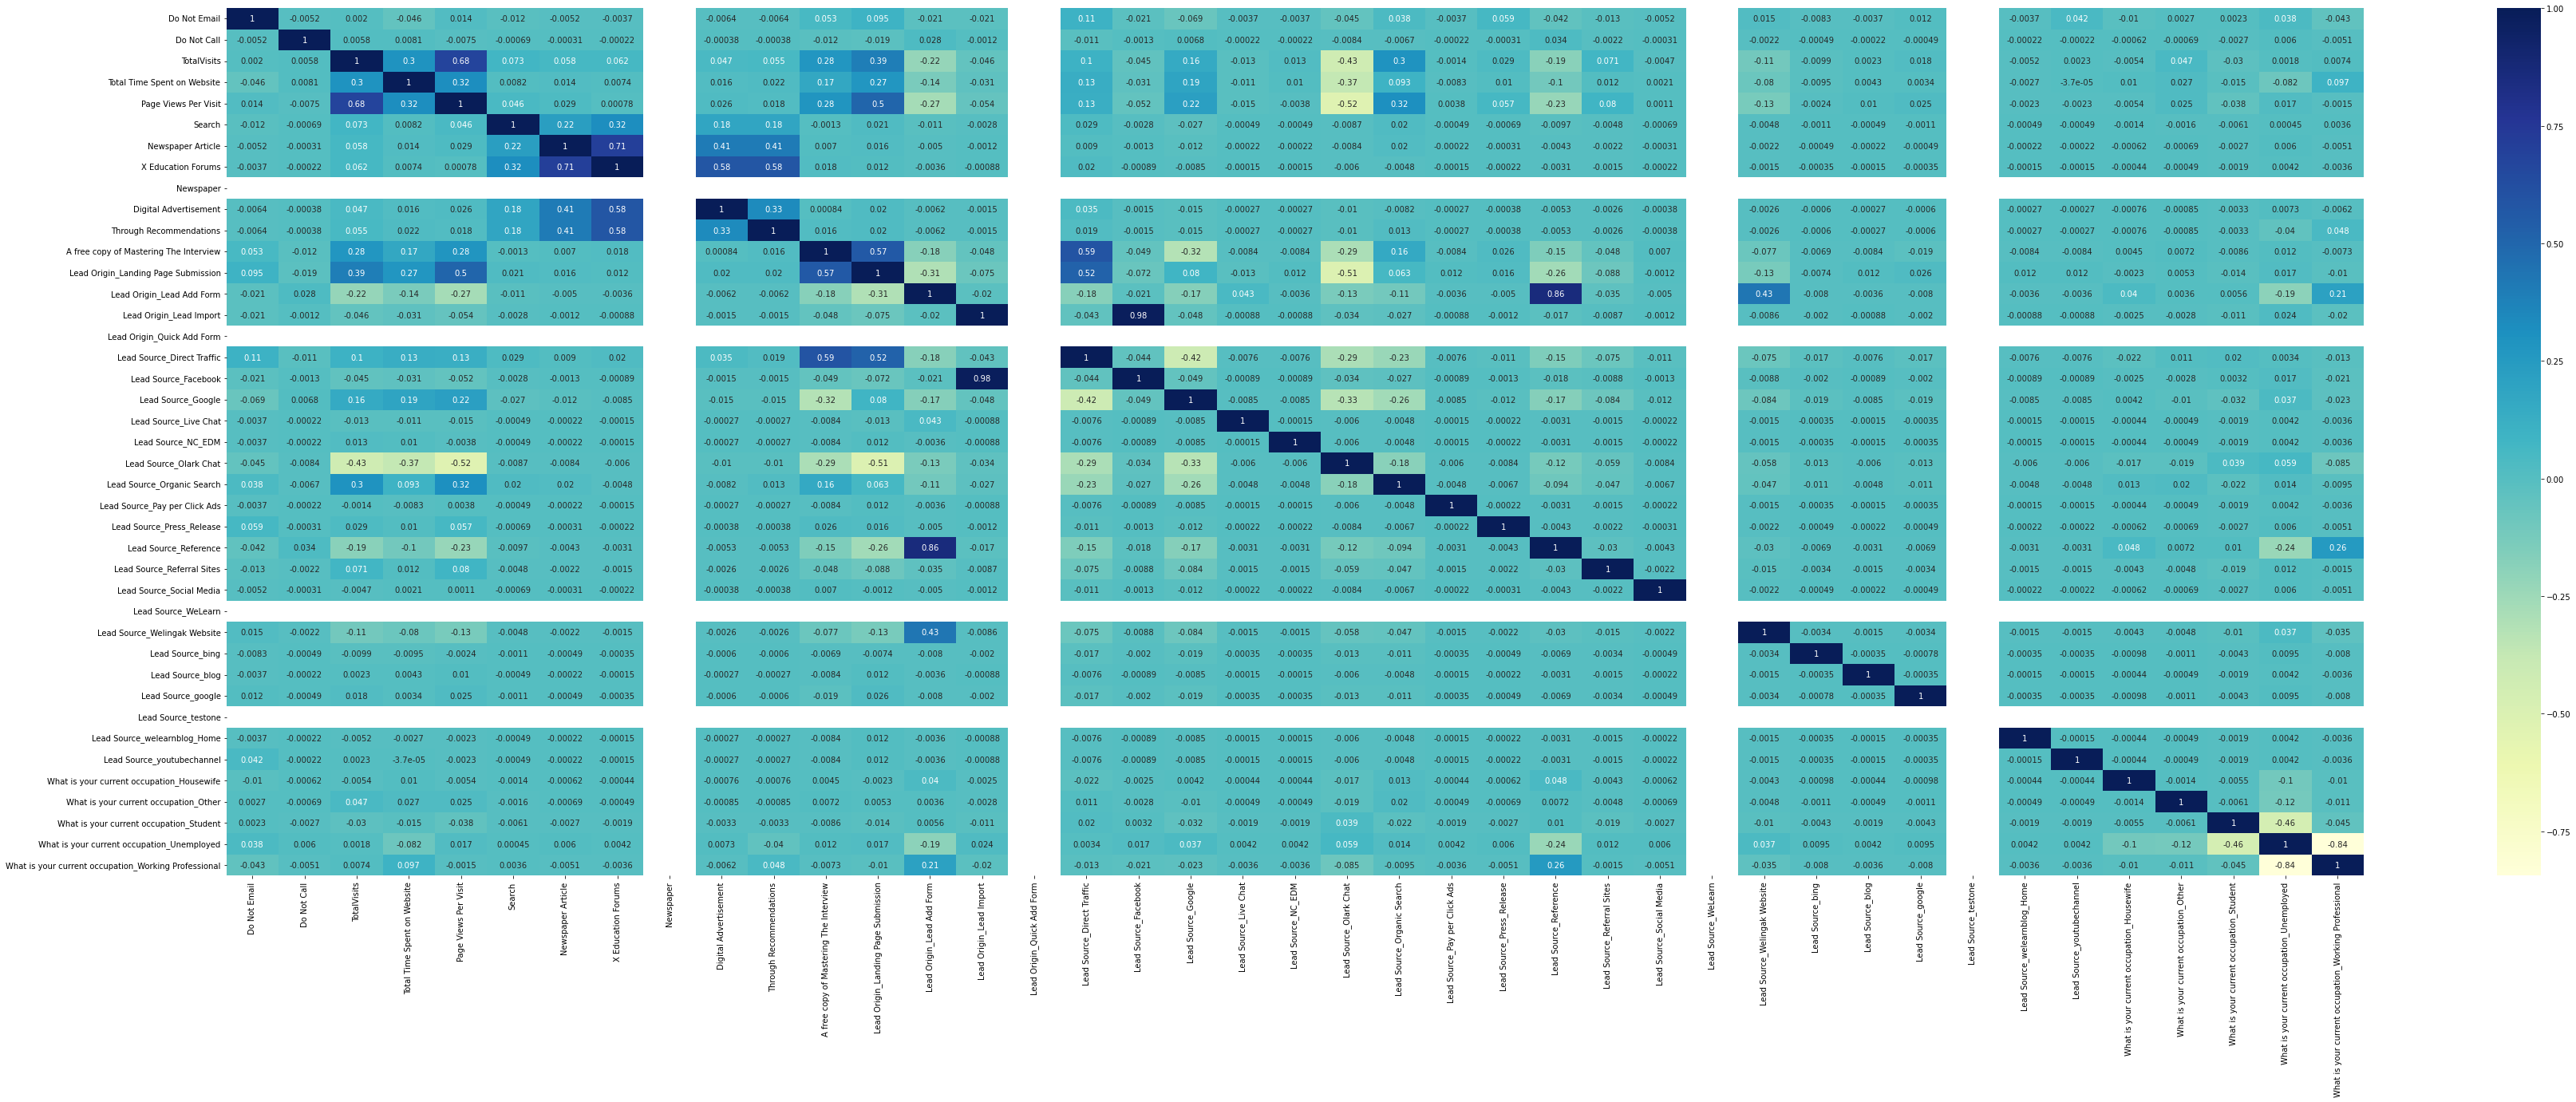

In [89]:
plt.figure(figsize=(60,20))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGnBu')
plt.show()

Dropping highly correlated dummy variables

In [90]:
X_train.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import','Newspaper','Lead Origin_Quick Add Form','Lead Source_WeLearn','Lead Source_testone','X Education Forums'],axis=1, inplace=True)

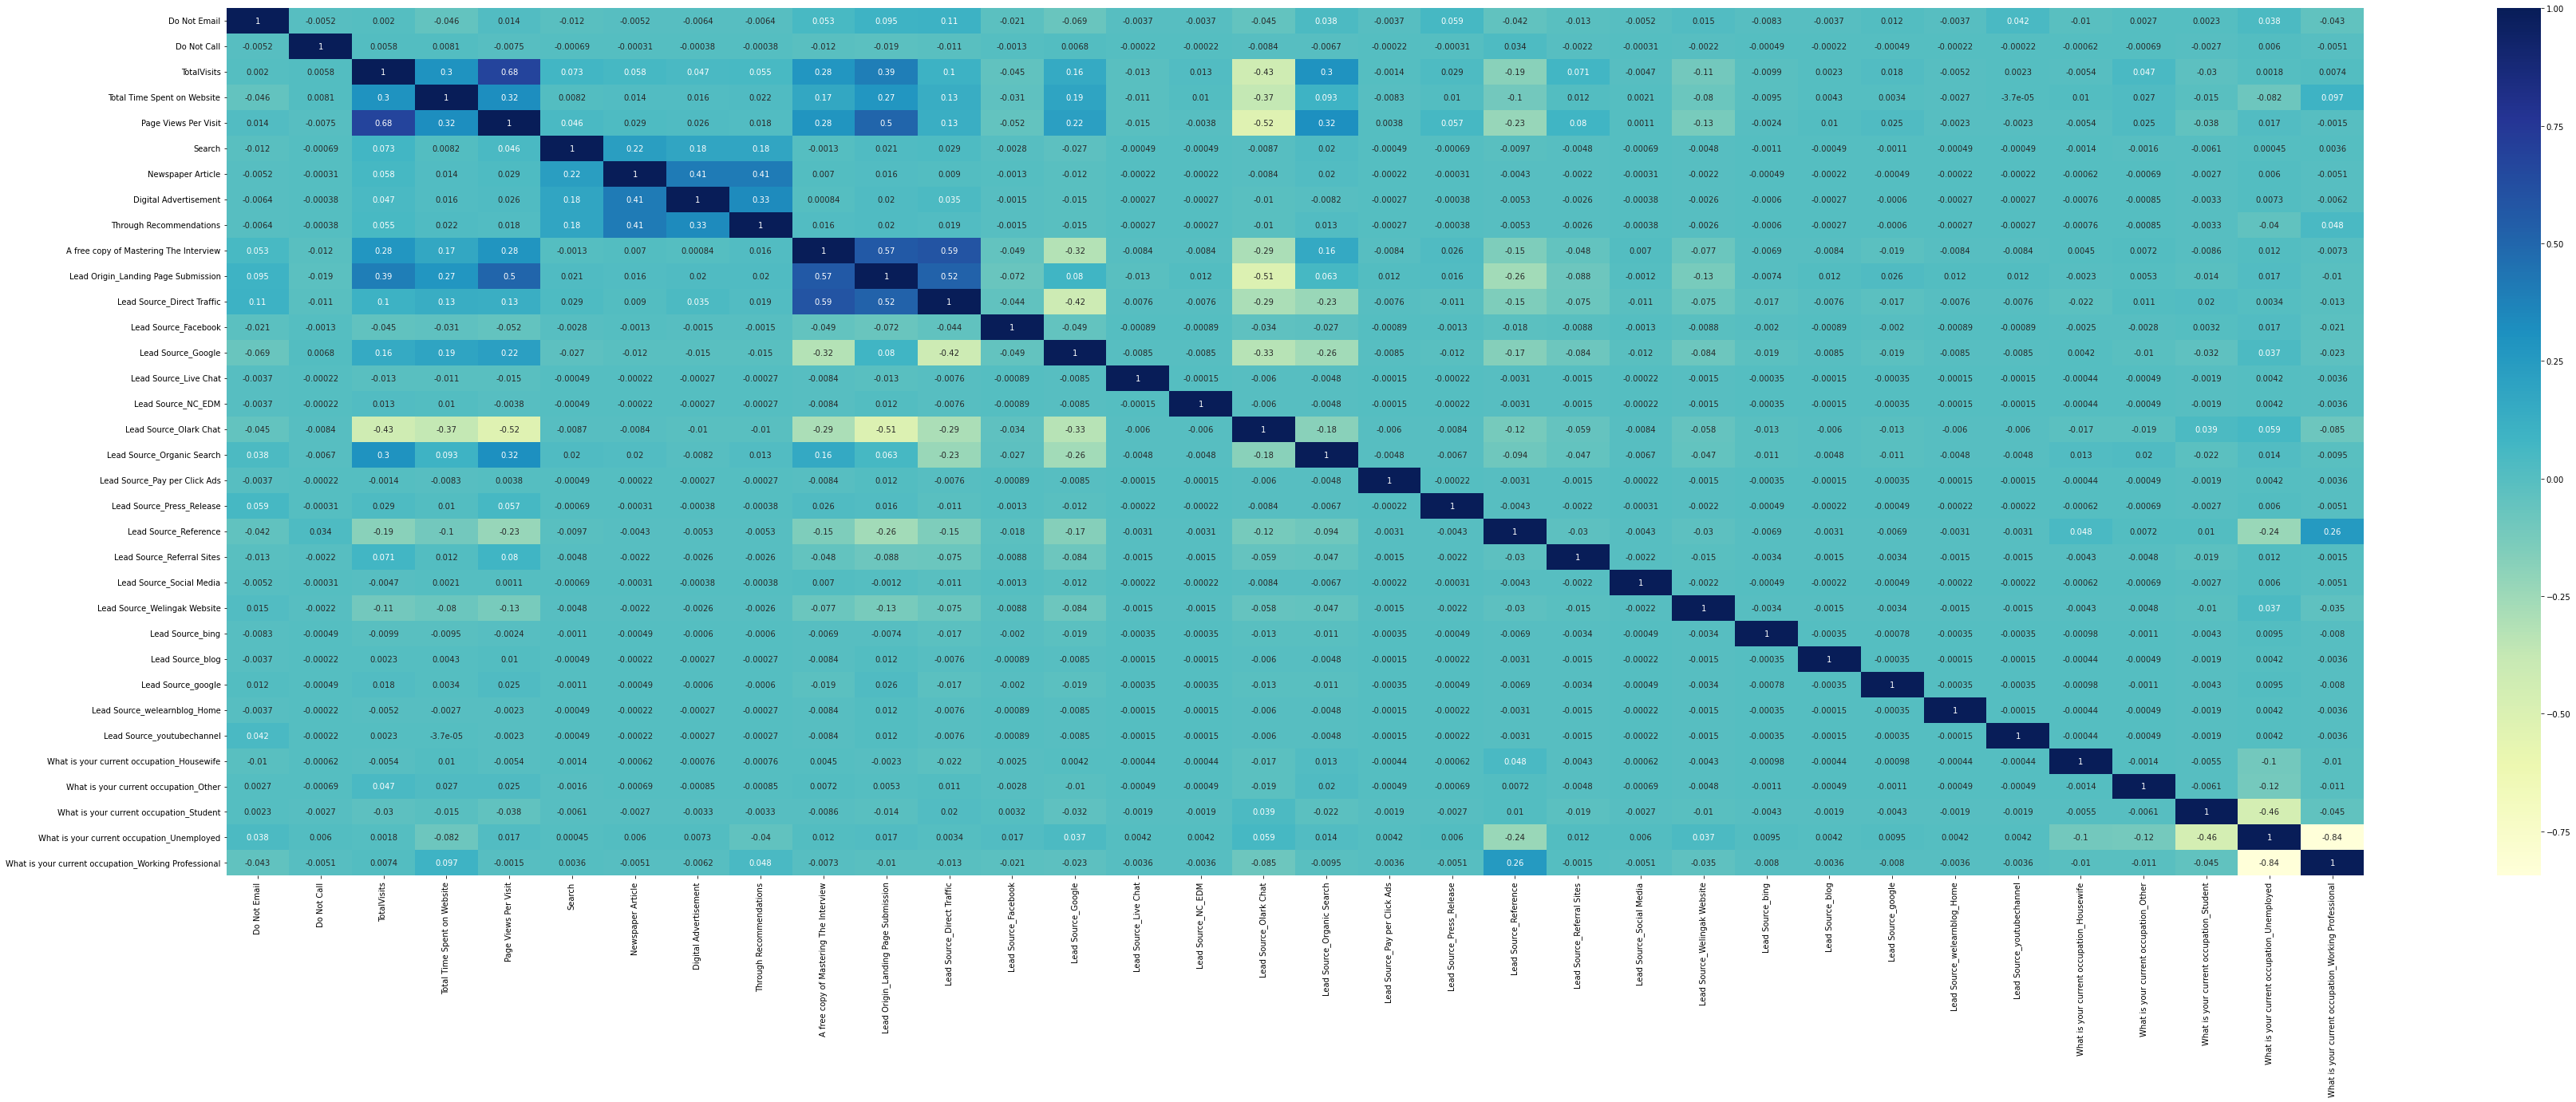

In [91]:
plt.figure(figsize=(60,20))
sns.heatmap(X_train.corr(), annot=True,cmap='YlGnBu')
plt.show()

### MODEL BUILDING

In [92]:
import statsmodels.api as sm

In [93]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6456
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3046.1
Date:                Tue, 18 Oct 2022   Deviance:                       6092.2
Time:                        17:51:54   Pearson chi2:                 8.28e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3230
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.1907   4.69e+04      0.001      1.000   -9.19e+04    9.19e+04
Do Not Email                                            -1.2466      0.152     -8.204      0.000      -1.544      -0.949
Do Not Call                                             21.9273   5.52e+04      0.000      1.000   -1.08e+05    1.08e+05
TotalVisits                                              0.1540      0.043      3.561      0.000       0.069       0.239
Total Time Spent on Website                              1.0783      0.037     29.218      0.000       1.006       1.151
Page Views Per Visit                                    -0.0466      0.049     -0.952      0.341      -0.143       0.049
Search                                                  -0.7298      0.870     -0.839      0.401      -2.435       0.975
Newspaper Article                                        0.9445      1.944      0.486      0.627      -2.865       4.754
Digital Advertisement                                   -0.4089      1.530     -0.267      0.789      -3.407       2.589
Through Recommendations                                 -1.0921      1.879     -0.581      0.561      -4.775       2.591
A free copy of Mastering The Interview                   0.0117      0.099      0.118      0.906      -0.182       0.205
Lead Origin_Landing Page Submission                     -0.0407      0.097     -0.421      0.674      -0.230       0.149
Lead Source_Direct Traffic                             -24.7816   4.69e+04     -0.001      1.000   -9.19e+04    9.19e+04
Lead Source_Facebook                                   -24.1819   4.69e+04     -0.001      1.000   -9.19e+04    9.19e+04
Lead Source_Google                                     -24.5458   4.69e+04     -0.001      1.000   -9.19e+04    9.19e+04
Lead Source_Live Chat                                    0.9959   9.23e+04   1.08e-05      1.000   -1.81e+05    1.81e+05
Lead Source_NC_EDM                                      -1.0797   9.23e+04  -1.17e-05      1.000   -1.81e+05    1.81e+05
Lead Source_Olark Chat                                 -23.8176   4.69e+04     -0.001      1.000   -9.19e+04    9.19e+04
Lead Source_Organic Search                             -24.5993   4.69e+04     -0.001      1.000   -9.19e+04    9.19e+04
Lead Source_Pay per Click Ads                          -46.4107   9.23e+04     -0.001      1.000   -1.81e+05    1.81e+05
Lead Source_Press_Release                              -46.8561   6.93e+04     -0.001      0.999   -1.36e+05    1.36e+05
Lead Source_Reference                                  -20.5126   4.69e+04     -0.000      1.000   -9.19e+04    9.19e+04
Lead Source_Referral Sites                             -25

### FEATURE SELECTION USINIG RFE

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Search', False, 3),
 ('Newspaper Article', False, 16),
 ('Digital Advertisement', False, 14),
 ('Through Recommendations', False, 13),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 10),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_blog', False, 2),
 

In [98]:
col = X_train.columns[rfe.support_]

In [99]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Social Media',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'What is your current occupation_Other'],
      dtype='object')

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6456
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3058.2
Date:                Tue, 18 Oct 2022   Deviance:                       6116.5
Time:                        17:51:58   Pearson chi2:                 8.17e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3204
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2979      0.574      0.519      0.604      -0.827       1.422
Do Not Email                                            -1.2609      0.152     -8.317      0.000      -1.558      -0.964
Total Time Spent on Website                              1.0836      0.037     29.519      0.000       1.012       1.156
Lead Source_Direct Traffic                              -0.8849      0.102     -8.659      0.000      -1.085      -0.685
Lead Source_Google                                      -0.6368      0.097     -6.580      0.000      -0.827      -0.447
Lead Source_Live Chat                                   24.8109   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                              -0.6274      0.117     -5.341      0.000      -0.858      -0.397
Lead Source_Press_Release                              -22.8181   5.12e+04     -0.000      1.000      -1e+05       1e+05
Lead Source_Reference                                    3.3175      0.233     14.252      0.000       2.861       3.774
Lead Source_Referral Sites                              -1.5700      0.318     -4.936      0.000      -2.194      -0.947
Lead Source_Welingak Website                             5.2344      0.724      7.234      0.000       3.816       6.653
Lead Source_google                                     -23.4472   3.18e+04     -0.001      0.999   -6.23e+04    6.22e+04
What is your current occupation_Housewife               22.8903   2.36e+04      0.001      0.999   -4.62e+04    4.63e+04
What is your current occupation_Student                 -0.5107      0.603     -0.846      0.397      -1.693       0.672
What is your current occupation_Unemployed              -0.5746      0.570     -1.008      0.313      -1.692       0.543
What is your current occupation_Working Professional     2.2001      0.595      3.697      0.000       1.034       3.366
========================================================================================================================
"""

In [101]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.729734
8706    0.075460
6366    0.223604
6158    0.938702
3078    0.992212
2178    0.125270
7368    0.223604
8886    0.665997
8345    0.223604
4899    0.200239
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72973425, 0.0754603 , 0.22360418, 0.93870243, 0.99221244,
       0.12527033, 0.22360418, 0.66599672, 0.22360418, 0.20023905])

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Lead Number
0,1,0.729734,1052
1,0,0.075460,8706
2,0,0.223604,6366
3,1,0.938702,6158
4,1,0.992212,3078
5,0,0.125270,2178
6,0,0.223604,7368
7,1,0.665997,8886
8,0,0.223604,8345
9,1,0.200239,4899


In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_prob,Lead Number,predicted
0,1,0.729734,1052,1
1,0,0.075460,8706,0
2,0,0.223604,6366,0
3,1,0.938702,6158,1
4,1,0.992212,3078,1
5,0,0.125270,2178,0
6,0,0.223604,7368,0
7,1,0.665997,8886,1
8,0,0.223604,8345,0
9,1,0.200239,4899,0


In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3500  465]
 [ 912 1579]]


In [107]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2))

78.67


In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,5.31
3,Lead Source_Google,3.04
2,Lead Source_Direct Traffic,2.73
5,Lead Source_Organic Search,1.81
14,What is your current occupation_Working Profes...,1.50
7,Lead Source_Reference,1.39
1,Total Time Spent on Website,1.23
0,Do Not Email,1.12
8,Lead Source_Referral Sites,1.09
12,What is your current occupation_Student,1.09


In [110]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6456
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3058.8
Date:                Tue, 18 Oct 2022   Deviance:                       6117.5
Time:                        17:51:59   Pearson chi2:                 8.18e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3203
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2755      0.075     -3.694      0.000      -0.422      -0.129
Do Not Email                                            -1.2601      0.151     -8.318      0.000      -1.557      -0.963
Total Time Spent on Website                              1.0843      0.037     29.542      0.000       1.012       1.156
Lead Source_Direct Traffic                              -0.8838      0.102     -8.650      0.000      -1.084      -0.684
Lead Source_Google                                      -0.6371      0.097     -6.583      0.000      -0.827      -0.447
Lead Source_Live Chat                                   24.8103   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                              -0.6248      0.117     -5.321      0.000      -0.855      -0.395
Lead Source_Press_Release                              -22.8207   5.12e+04     -0.000      1.000      -1e+05       1e+05
Lead Source_Reference                                    3.3210      0.233     14.270      0.000       2.865       3.777
Lead Source_Referral Sites                              -1.5715      0.318     -4.940      0.000      -2.195      -0.948
Lead Source_Welingak Website                             5.2336      0.724      7.233      0.000       3.815       6.652
Lead Source_google                                     -23.4488   3.18e+04     -0.001      0.999   -6.23e+04    6.22e+04
What is your current occupation_Housewife               23.4619   2.36e+04      0.001      0.999   -4.62e+04    4.63e+04
What is your current occupation_Student                  0.0619      0.203      0.304      0.761      -0.337       0.461
What is your current occupation_Working Professional     2.7727      0.177     15.636      0.000       2.425       3.120
========================================================================================================================
"""

In [112]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [113]:
y_train_pred[:10]

array([0.73016691, 0.07555593, 0.22369648, 0.93873432, 0.99222848,
       0.12546168, 0.22369648, 0.66643912, 0.22369648, 0.20078926])

In [114]:
y_train_pred_final['Converted_prob'] = y_train_pred

In [115]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,1,0.730167,1052,1
1,0,0.075556,8706,0
2,0,0.223696,6366,0
3,1,0.938734,6158,1
4,1,0.992228,3078,1


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7870198265179678


In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Working Profes...,1.17
7,Lead Source_Reference,1.13
0,Do Not Email,1.11
2,Lead Source_Direct Traffic,1.11
1,Total Time Spent on Website,1.09
3,Lead Source_Google,1.07
5,Lead Source_Organic Search,1.04
12,What is your current occupation_Student,1.02
9,Lead Source_Welingak Website,1.01
11,What is your current occupation_Housewife,1.01


In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3500,  465],
       [ 910, 1581]], dtype=int64)

In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7870198265179678

## Metrics beyond simply accuracy

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6346848655158571

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.8827238335435057

In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11727616645649433


In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.7727272727272727


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7936507936507936


In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

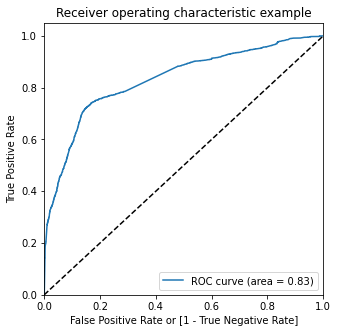

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.730167,1052,1,1,1,1,1,1,1,1,1,0,0
1,0,0.075556,8706,0,1,0,0,0,0,0,0,0,0,0
2,0,0.223696,6366,0,1,1,1,0,0,0,0,0,0,0
3,1,0.938734,6158,1,1,1,1,1,1,1,1,1,1,1
4,1,0.992228,3078,1,1,1,1,1,1,1,1,1,1,1


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385843  1.000000  0.000000
0.1   0.1  0.443463  0.991971  0.098865
0.2   0.2  0.633364  0.901244  0.465069
0.3   0.3  0.791822  0.747090  0.819924
0.4   0.4  0.801580  0.707748  0.860530
0.5   0.5  0.787020  0.634685  0.882724
0.6   0.6  0.772150  0.545965  0.914250
0.7   0.7  0.750774  0.434765  0.949306
0.8   0.8  0.727850  0.329185  0.978310
0.9   0.9  0.687113  0.198715  0.993947


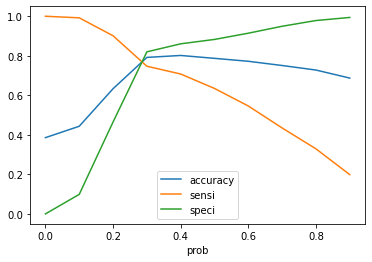

In [131]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.730167,1052,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.075556,8706,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.223696,6366,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.938734,6158,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.992228,3078,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0.125462,2178,0,1,1,0,0,0,0,0,0,0,0,0
6,0,0.223696,7368,0,1,1,1,0,0,0,0,0,0,0,0
7,1,0.666439,8886,1,1,1,1,1,1,1,1,0,0,0,1
8,0,0.223696,8345,0,1,1,1,0,0,0,0,0,0,0,0
9,1,0.200789,4899,0,1,1,1,0,0,0,0,0,0,0,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.79182156133829

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3251,  714],
       [ 630, 1861]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7470895222802088

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.8199243379571248

In [138]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18007566204287515


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7227184466019417


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8376707034269518


## Precision and Recall

Precision

TP / TP + FP

In [141]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7727272727272727

Recall

TP / TP + FN

In [142]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6346848655158571

## Precision and recall tradeoff

In [143]:
from sklearn.metrics import precision_recall_curve

In [144]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6451    0
 6452    1
 6453    0
 6454    0
 6455    0
 Name: Converted, Length: 6456, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6451    0
 6452    1
 6453    1
 6454    0
 6455    0
 Name: predicted, Length: 6456, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

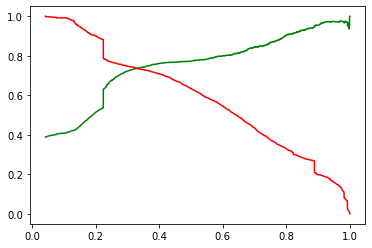

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [147]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8985,0,0,-0.413805,-0.836760,-0.182934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4864,0,0,-1.009131,-0.893442,-1.165440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3435,0,0,-0.116142,1.415916,0.308319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
856,0,0,-0.116142,-0.525920,0.308319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6306,0,0,-0.116142,1.468942,0.308319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
X_test.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import','Newspaper','Lead Origin_Quick Add Form','Lead Source_WeLearn','Lead Source_testone','X Education Forums'],axis=1, inplace=True)

In [149]:
X_test_sm = sm.add_constant(X_test[col])

In [150]:
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [151]:
y_test_pred = res.predict(X_test_sm)

In [152]:
y_test_pred[:10]

8985    0.112385
4864    0.223696
3435    0.650839
856     0.184998
6306    0.606715
6265    0.822754
4457    0.734513
4527    0.139728
2538    0.853200
2693    0.223696
dtype: float64

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [154]:
# Let's see the head
y_pred_1.head()

,0
8985,0.112385
4864,0.223696
3435,0.650839
856,0.184998
6306,0.606715


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Putting Lead_Number to index
y_test_df['Lead_Number'] = y_test_df.index

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
y_pred_final.head()

,Converted,Lead_Number,0
0,1,8985,0.112385
1,0,4864,0.223696
2,1,3435,0.650839
3,0,856,0.184998
4,0,6306,0.606715


In [160]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [161]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead_Number,Converted_Prob
0,1,8985,0.112385
1,0,4864,0.223696
2,1,3435,0.650839
3,0,856,0.184998
4,0,6306,0.606715


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [163]:
y_pred_final.head(20)

,Converted,Lead_Number,Converted_Prob,final_predicted
0,1,8985,0.112385,0
1,0,4864,0.223696,0
2,1,3435,0.650839,1
3,0,856,0.184998,0
4,0,6306,0.606715,1
5,1,6265,0.822754,1
6,0,4457,0.734513,1
7,0,4527,0.139728,0
8,0,2538,0.853200,1
9,0,2693,0.223696,0


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7932779183230936

With the current cut off as 0.3 we have 79% of Accuracy and 63% of Recall
